# FVGP Single Task Notebook
In this notebook we will go through many features of FVGP. We will be primarily concerned with regression over a single dimension output and single task. See the multiple_task_test_notebook.ipynb for single dimension and multiple task example.

## Import fvgp and relevant libraries

In [1]:
import fvgp
from fvgp import gp
import numpy as np
import matplotlib.pyplot as plt

## Defining some input data and testing points

In [2]:
def test_data_function(x):
    return np.sin(0.1 * x)+np.cos(0.05 * x)

In [3]:
x_input = np.linspace(-2*np.pi, 10*np.pi,20)

In [4]:
y_output = test_data_function(x_input)

In [5]:
x_input_test = np.linspace(-2*np.pi, 10*np.pi, 100)

## Setting up the fvgp single task object
NOTE: The input data need to be given in the form (N x input_space_dim). The output can either be a N array or N x 1 array where N is the number of data points. See help(gp.GP) for more information.

In [6]:
obj = gp.GP(input_space_dim = 1, points = x_input.reshape(-1,1),
                            values = y_output.reshape(-1,1),
                           init_hyperparameters = np.array([10,10]))

CAUTION: you have not provided data variances in fvGP,
they will be set to 1 percent of the data values!


## Training our gaussian process regression on given data


In [7]:
hyper_param_bounds = np.array([[0.0001, 1000000],[ 0.000001, 100]])
obj.train(hyper_param_bounds)

fvGP training started with  20  data points
fvGP hyperparameter tuning in progress. Old hyperparameters:  [10 10]  with old log likelihood:  31.008946083279657
method:  global
fvGP is performing a global differential evolution algorithm to find the optimal hyperparameters.
maximum number of iterations:  120
termination tolerance:  0.0001
bounds:  [[1.e-04 1.e+06]
 [1.e-06 1.e+02]]
differential_evolution step 1: f(x)= 77.8481
differential_evolution step 2: f(x)= 77.8481
differential_evolution step 3: f(x)= 77.8481
differential_evolution step 4: f(x)= 52.8518
differential_evolution step 5: f(x)= 52.8518
differential_evolution step 6: f(x)= 52.8518
differential_evolution step 7: f(x)= 42.8718
differential_evolution step 8: f(x)= 42.8718
differential_evolution step 9: f(x)= 42.8718
differential_evolution step 10: f(x)= 42.8718
differential_evolution step 11: f(x)= 39.6229
differential_evolution step 12: f(x)= 17.1744
differential_evolution step 13: f(x)= 17.1744
differential_evolution step

## Looking the posterior mean at the test points

In [8]:
post_mean= obj.posterior_mean(x_input_test.reshape(-1,1))

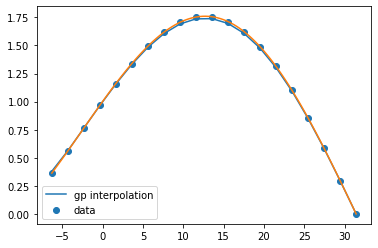

In [9]:
plt.plot(x_input_test, post_mean['f(x)'], label='gp interpolation')
plt.scatter(x_input, y_output, label='data')
plt.plot(x_input_test,test_data_function(x_input_test), label = '')
plt.legend()

# Training Asynchronously 

In [10]:
obj = gp.GP(input_space_dim = 1, points = x_input.reshape(-1,1),
                            values = y_output.reshape(-1,1),
                           init_hyperparameters = np.array([10,10]),
                            variances = np.zeros(y_output.reshape(-1,1).shape))


In [11]:
hyper_param_bounds = np.array([[0.0001, 100], [ 0.0001, 100]])

In [12]:
async_obj = obj.train_async(hyper_param_bounds)

Async fvGP training started with  20  data points
fvGP submitted HGDL optimization for asynchronous training
bounds: [[1.e-04 1.e+02]
 [1.e-04 1.e+02]]
HGDL starts with:  [[10.         10.        ]
 [69.14899662 80.98646713]
 [78.46734401 52.15117839]]


## Updating asynchronously
Updates hyperparameters to current optimization values

In [13]:
obj.update_hyperparameters(async_obj)

fvGP async hyperparameter update successful
Latest hyperparameters:  [10. 10.]


array([10., 10.])

## Killing training 


In [14]:
obj.kill_training(async_obj)

fvGP is killing asynchronous training....
HGDL kill initialized ...
HGDL kill successful
fvGP successfully killed the training.


## Looking the posterior mean at the test points

In [15]:
post_mean= obj.posterior_mean(x_input_test.reshape(-1,1))

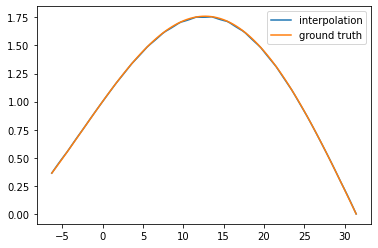

In [16]:
plt.plot(x_input_test, post_mean['f(x)'], label='interpolation')
plt.plot(x_input_test, test_data_function(x_input_test), label='ground truth')
plt.legend()

# Custom Kernels

In [17]:
def kernel_l1(x1,x2, hp, obj):
    ################################################################
    ###standard anisotropic kernel in an input space with l1########
    ################################################################
    d1 = abs(np.subtract.outer(x1[:,0],x2[:,0])) 
    return hp[0] * np.exp(-d1/hp[1])

In [18]:
obj = gp.GP(input_space_dim = 1, points = x_input.reshape(-1,1),
                            values = y_output.reshape(-1,1),
                           init_hyperparameters = np.array([10,10]),
                            variances = np.zeros(y_output.reshape(-1,1).shape),
                            gp_kernel_function = kernel_l1)

## Training our gaussian process regression on given data


In [19]:
hyper_param_bounds = np.array([[0.0001, 1000],[ 0.0001, 1000]])
obj.train(hyper_param_bounds)

fvGP training started with  20  data points
fvGP hyperparameter tuning in progress. Old hyperparameters:  [10 10]  with old log likelihood:  30.952325741923985
method:  global
fvGP is performing a global differential evolution algorithm to find the optimal hyperparameters.
maximum number of iterations:  120
termination tolerance:  0.0001
bounds:  [[1.e-04 1.e+03]
 [1.e-04 1.e+03]]
differential_evolution step 1: f(x)= -2.92363
differential_evolution step 2: f(x)= -2.92363
differential_evolution step 3: f(x)= -2.92363
differential_evolution step 4: f(x)= -3.37999
differential_evolution step 5: f(x)= -3.37999
differential_evolution step 6: f(x)= -3.62782
differential_evolution step 7: f(x)= -3.62782
differential_evolution step 8: f(x)= -3.63359
differential_evolution step 9: f(x)= -3.63359
differential_evolution step 10: f(x)= -3.75559
differential_evolution step 11: f(x)= -3.75559
differential_evolution step 12: f(x)= -3.83232
differential_evolution step 13: f(x)= -3.8449
differential_ev

## Looking the posterior mean at the test points

In [20]:
post_mean= obj.posterior_mean(x_input_test.reshape(-1,1))

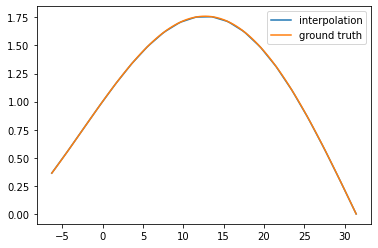

In [21]:
plt.plot(x_input_test, post_mean['f(x)'], label='interpolation')
plt.plot(x_input_test, test_data_function(x_input_test), label='ground truth')
plt.legend()

# Prior Mean Functions
### NOTE: The prior mean function must return a 1d vector, e.g., (100,)

In [22]:
def example_mean(gp_obj,x,hyperparameters):
    return np.ones(len(x))

In [23]:
obj = gp.GP(input_space_dim = 1, points = x_input.reshape(-1,1),
                            values = y_output.reshape(-1,1),
                           init_hyperparameters = np.array([10,10]),
                            variances = np.zeros(y_output.reshape(-1,1).shape),
                            gp_mean_function = example_mean)

## Training our gaussian process regression on given data


In [24]:
hyper_param_bounds = np.array([[0.0001, 1000],[ 0.0001, 1000]])
obj.train(hyper_param_bounds)

fvGP training started with  20  data points
fvGP hyperparameter tuning in progress. Old hyperparameters:  [10 10]  with old log likelihood:  30.944091357922787
method:  global
fvGP is performing a global differential evolution algorithm to find the optimal hyperparameters.
maximum number of iterations:  120
termination tolerance:  0.0001
bounds:  [[1.e-04 1.e+03]
 [1.e-04 1.e+03]]
differential_evolution step 1: f(x)= -3.12956
differential_evolution step 2: f(x)= -3.21522
differential_evolution step 3: f(x)= -3.21522
differential_evolution step 4: f(x)= -3.80892
differential_evolution step 5: f(x)= -3.80892
differential_evolution step 6: f(x)= -3.80892
differential_evolution step 7: f(x)= -3.80892
differential_evolution step 8: f(x)= -3.80892
differential_evolution step 9: f(x)= -3.80892
differential_evolution step 10: f(x)= -3.86106
differential_evolution step 11: f(x)= -3.89418
differential_evolution step 12: f(x)= -4.0087
differential_evolution step 13: f(x)= -4.00946
differential_ev

## Looking the posterior mean at the test points

In [25]:
post_mean= obj.posterior_mean(x_input_test.reshape(-1,1))

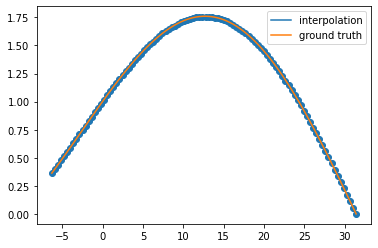

In [26]:
plt.plot(x_input_test, post_mean['f(x)'], label='interpolation')
plt.plot(x_input_test, test_data_function(x_input_test), label='ground truth')
plt.scatter(x_input_test,post_mean['f(x)'])
plt.legend()